# Moving Average Smoothing and MA(q)
- TUTORIAL: [Moving Average Smoothing for Data Preparation and Time Series Forecasting in Python](https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/) by Jason Brownlee

- CODE: [MA](https://github.com/marcopeix/TimeSeriesForecastingInPython/blob/master/CH04/CH04.ipynb) by Marco Peixeiro 

- TUTORIAL: [Time series: A simple moving average (MA) model](https://www.kaggle.com/code/carlmcbrideellis/time-series-a-simple-moving-average-ma-model) by Carl Mcbride Ellis

## TODOs
- [x] Finish reproducing Jason's tutorial
- [ ] Finish reproducing Marco's code

In [1]:
import os
import sys

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
print(notebook_dir)

# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../framework_for_time_series_data/tslearn/'))

from collections import namedtuple
from ts_models import Model, MA, EvaluationMetric
from data_loader import build_any_univariate_time_series, build_stock_uts
from time_series import TimeSeriesFactory, UnivariateTimeSeries

/Users/brinkley97/Documents/development/applied_time_series_and_machine_learning/play


In [2]:
path_to_file = "../datasets/daily-total-female-births.csv"
ts = build_any_univariate_time_series(path_to_file)
ts

UnivariateTimeSeries(Observations)

In [3]:
ts.get_as_df()

,Observations
Timestamp,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


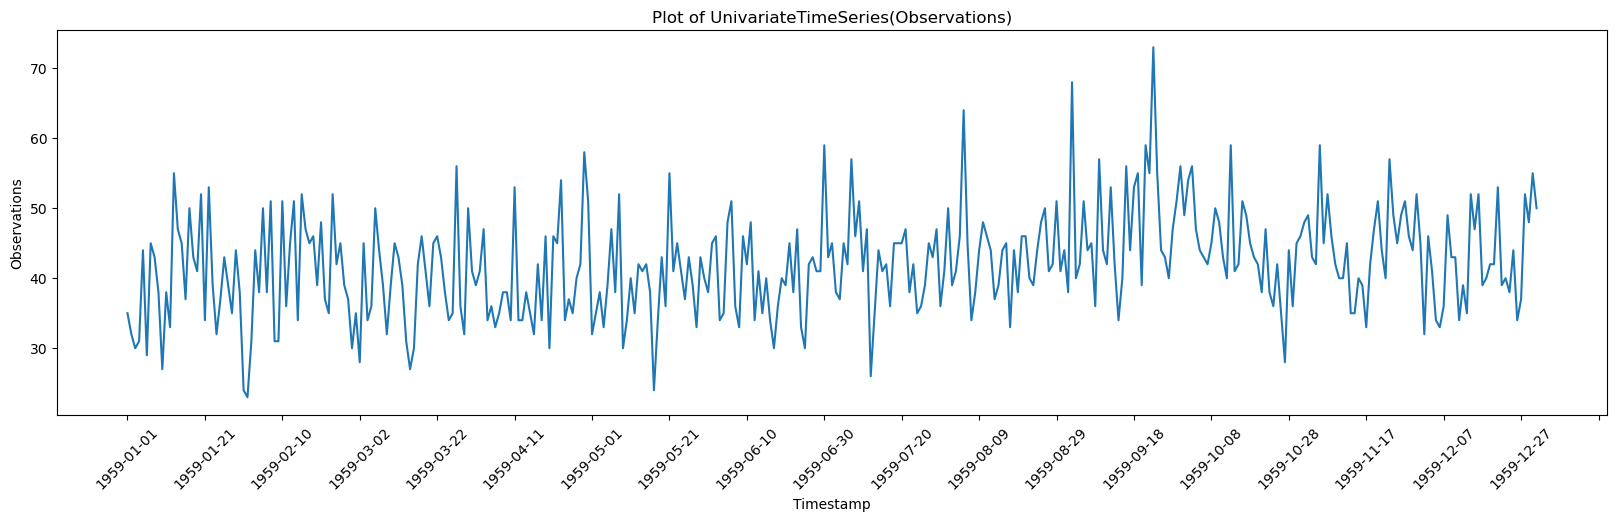

In [4]:
ts.plot(tick_skip=20)

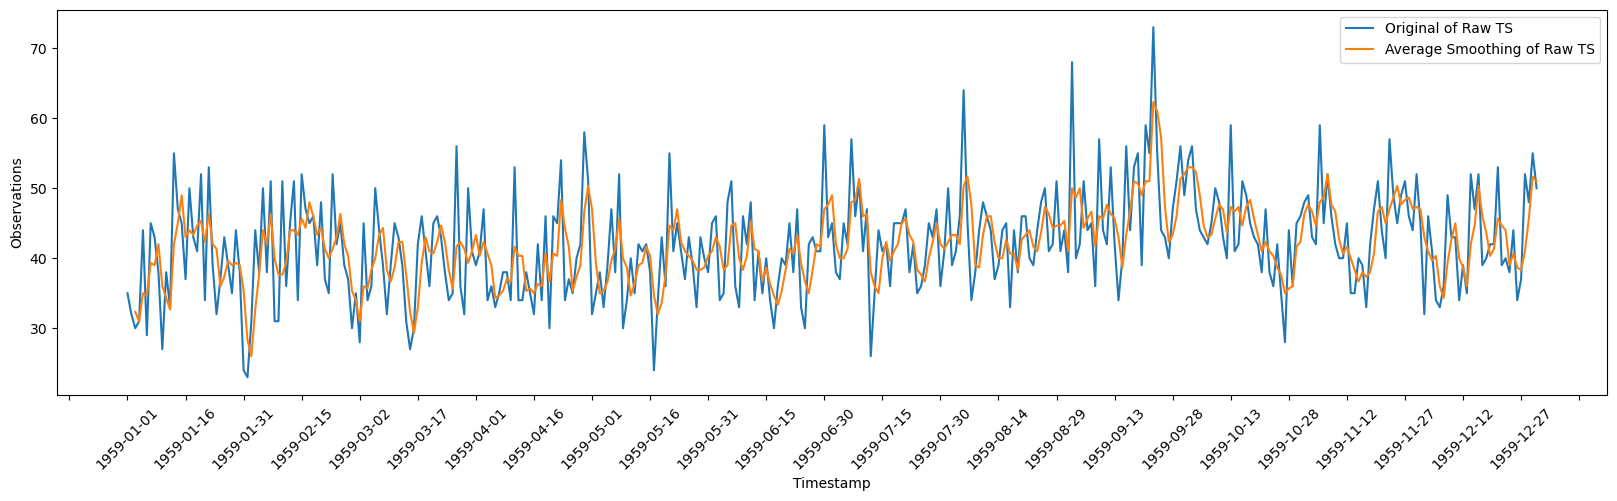

In [5]:
ts_with_avg_smoothing = ts.average_smoothing(3)

In [6]:
ts_with_avg_smoothing.get_as_df()

,Observations
Timestamp,
1959-01-03,32.333333
1959-01-04,31.000000
1959-01-05,35.000000
1959-01-06,34.666667
1959-01-07,39.333333
...,...
1959-12-27,38.333333
1959-12-28,41.000000
1959-12-29,45.666667


In [7]:
path_to_file = "../datasets/widget_sales.csv"
ws_ts = build_any_univariate_time_series(path_to_file)
ws_ts

UnivariateTimeSeries(Observations)

In [8]:
ws_ts.get_as_df()

,Observations
Timestamp,
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108
...,...
495,64.087371
496,63.992081
497,63.029894


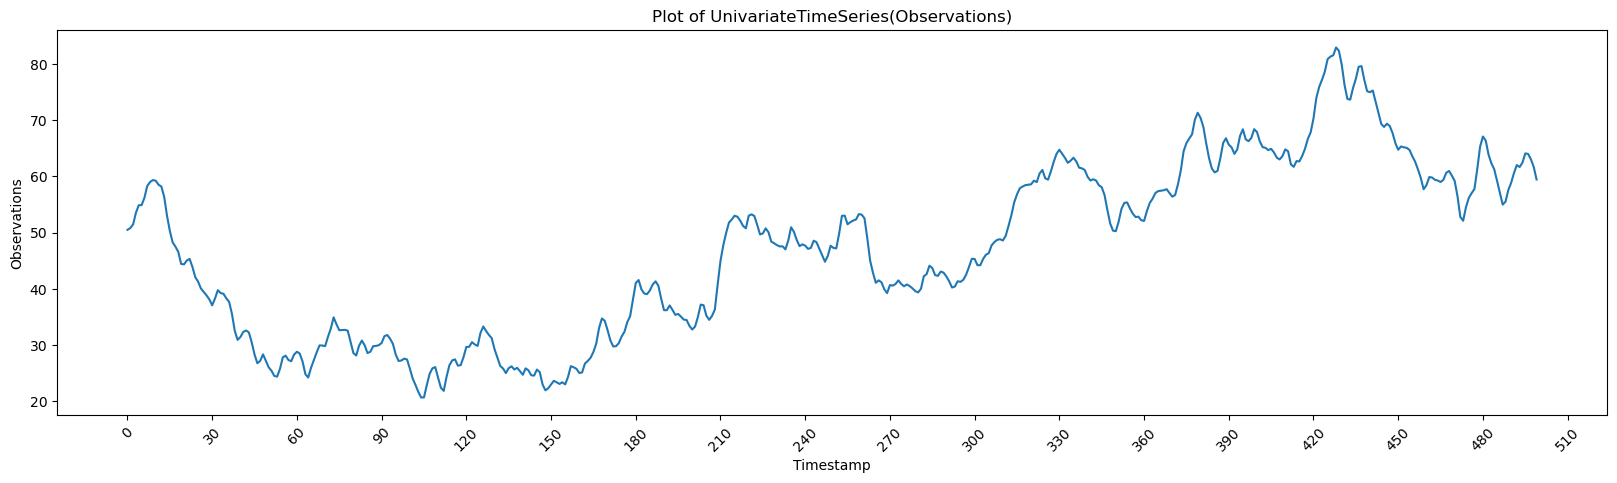

In [9]:
ws_ts.plot(tick_skip=30)

- A negative trend exists from 0 to ~60.
- A positive trend exists from 150 to ~430.
- Possibly cyclic behavior in windows of (1) 270 to 350, (2) 350 to 410, and (3) 390 to 425 as all have a positive trend, then a small negative dip.

In [10]:
ws_ts.stationarity_test(ws_ts.get_as_df())

ADF Statistic: -1.512166
p-value: 0.527485 > 0.05 , so accept the null-hypothesis as the TS is non-stationary
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


In [11]:
ws_ts_diff = ws_ts.data_augment_with_differencing(1)
ws_ts_diff, len(ws_ts_diff)

(UnivariateTimeSeries(Order-1 Difference of Observations), 499)

In [12]:
ws_ts_diff.stationarity_test(ws_ts_diff.get_as_df())

ADF Statistic: -10.576658
p-value: 0.000000 < 0.05 , so reject null-hypothesis as the TS is stationary
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


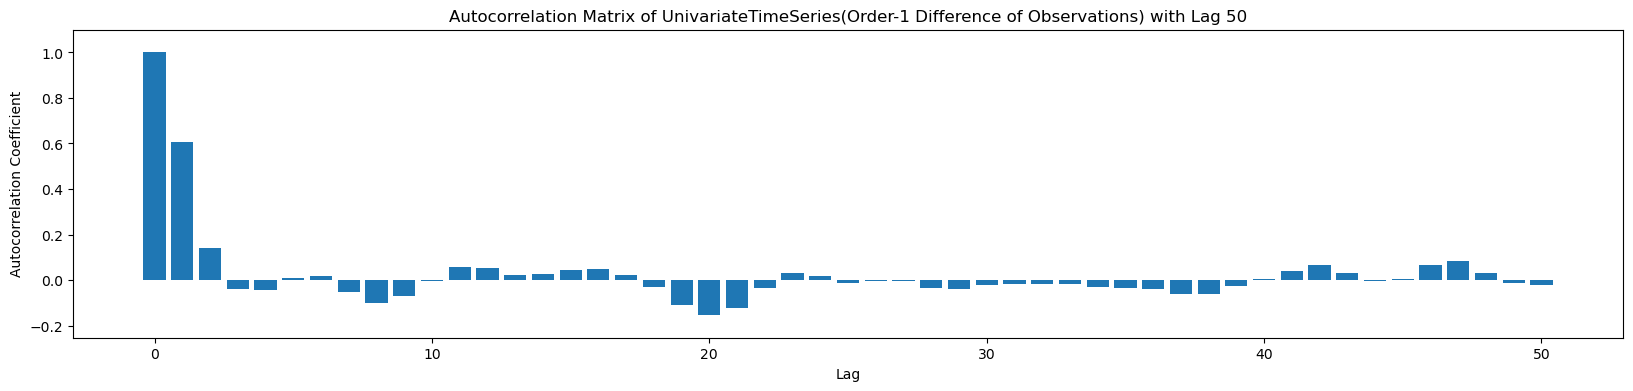

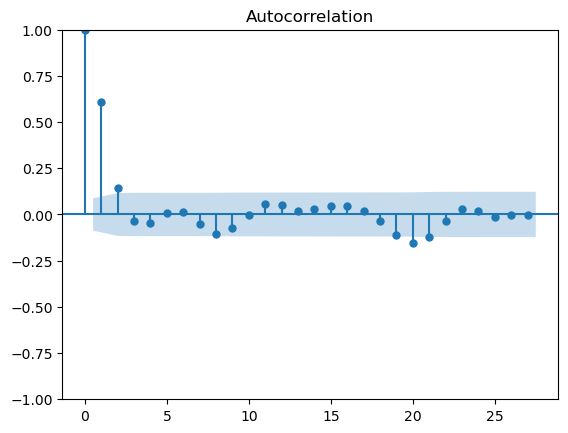

In [13]:
ws_ts_diff.plot_autocorrelation(50)

- A slow decline from the current observation, thus there exists correlation (also called dependence) between the current observation up to lag 2. 
- Seems to be a cycle starting at lag 3. 
- `MA(q)` = [2, 3], 2 bc there's little dependence and 3 because there's no dependence which proves the stationary assumption for MA (because it's within the confidence region)

In [19]:
observations_to_forecast = [50]

for i in range(len(observations_to_forecast)):
    total_observations = len(ws_ts_diff.get_series())
    print(f'Total observations {total_observations}')
    
    test_observations = observations_to_forecast[i]
    print(f'Test observations considered {test_observations}')
    
    training_observations = total_observations - test_observations
    print(f'Training observations considered {training_observations}\n')

Total observations 499
Test observations considered 50
Training observations considered 449



In [20]:
ma_model_class = MA()
ma_model_class

MA()

In [24]:
training_observations

449

In [25]:
test_observations

50

In [21]:
ma_predictions = ma_model_class.train_ma_model(ws_ts_diff.get_as_df(), training_observations, 2, 2)
ma_predictions

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brink

[-1.0788329052967953,
 -0.2733088341541773,
 0.7812231645948146,
 0.23496895921919306,
 0.1689942821336725,
 0.1158101204074735,
 -0.7956658163604734,
 -0.19128582502239017,
 -0.9228241988467996,
 -0.2540603751601308,
 -1.21730063699449,
 -0.3124252697849206,
 0.5657676039854014,
 0.023721913340603,
 -0.05598170730324467,
 0.02938929226913145,
 -0.21053526258261193,
 -0.055502393862479654,
 0.8263060046914199,
 0.19614679192924006,
 -0.6373777793358049,
 -0.14865794040054267,
 -2.0594613635030248,
 -0.5720214439903248,
 0.6998508103304535,
 0.315068809779309,
 0.28388535596376796,
 -0.04294734657073943,
 0.41078868182631856,
 0.07797000180180769,
 1.8396128709798443,
 0.3050521903358094,
 -0.8951704995317802,
 -0.265055671130045,
 -0.2887809956696881,
 0.040554305404378994,
 -1.4423408092946348,
 -0.3701864299438731,
 -1.1538339488988514,
 -0.29101454891751566,
 1.2273880644318074,
 0.23498246962194347,
 1.294212499399127,
 0.38027907770170005,
 -0.7012488553128561,
 -0.216955958351789

In [26]:
pred_df = ws_ts_diff.get_as_df()[:test_observations].copy()
pred_df

,Order-1 Difference of Observations
Timestamp,
1,0.308778
2,0.672265
3,2.064470
4,1.330880
5,0.012034
6,1.298244
7,2.118485
8,0.694981
9,0.350264


In [27]:
pred_df['MA Predictions'] = ma_predictions
pred_df

,Order-1 Difference of Observations,MA Predictions
Timestamp,,
1,0.308778,-1.078833
2,0.672265,-0.273309
3,2.064470,0.781223
4,1.330880,0.234969
5,0.012034,0.168994
6,1.298244,0.115810
7,2.118485,-0.795666
8,0.694981,-0.191286
9,0.350264,-0.922824


<AxesSubplot: xlabel='Timestamp'>

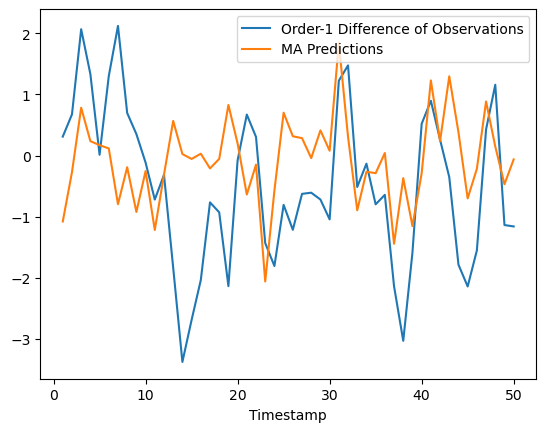

In [28]:
pred_df.plot()

In [7]:
# import yfinance as yf
# IBEX = yf.Ticker("^IBEX")
# # get historical market data
# IBEX_values = IBEX.history(start="2020-06-01")

In [8]:
# IBEX_values

In [9]:
stock_symbol = "^IBEX" 
stock_name = "Ibex Ltd"
independent_variable = "Close"
start_date = "2020-06-01"
end_date = "2021-06-05"
frequency = '1d'
stock_ts = build_stock_uts(stock_symbol, stock_name, independent_variable, start_date, end_date, frequency)

[*********************100%***********************]  1 of 1 completed


In [10]:
stock_ts

UnivariateTimeSeries(Close)

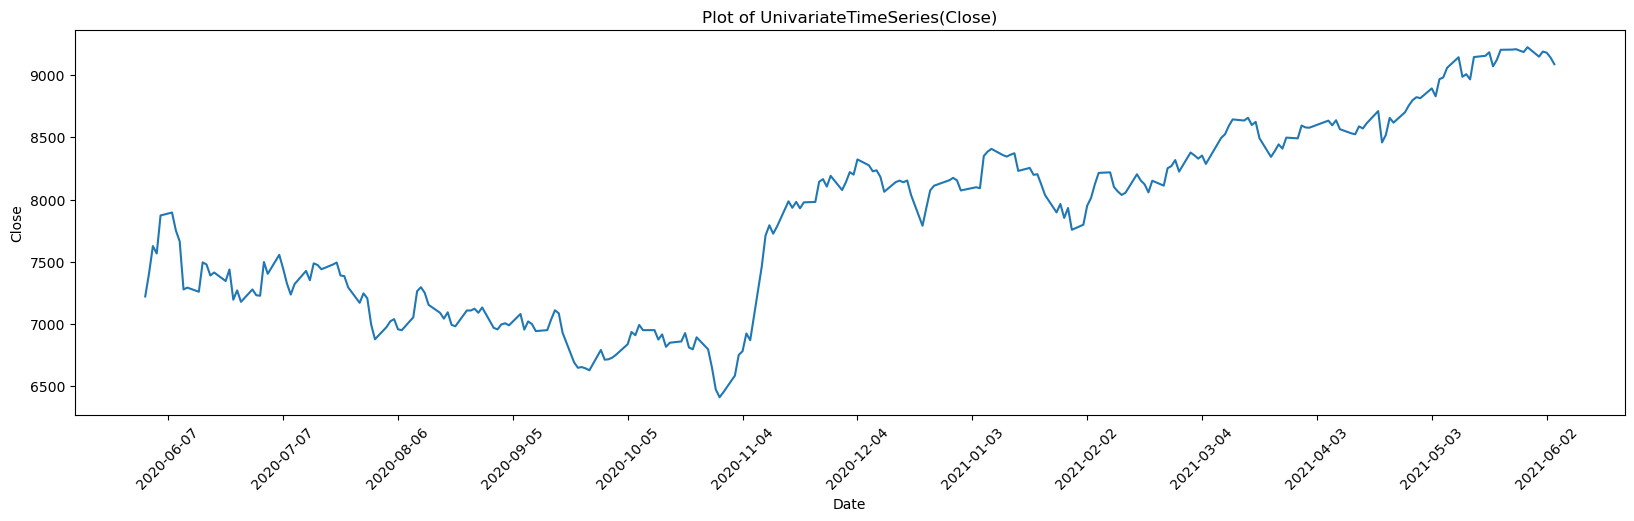

In [11]:
stock_ts.plot(tick_skip=30)

In [12]:
stock_ts.get_as_df()

,Close
Date,
2020-06-01,7221.399902
2020-06-02,7408.100098
2020-06-03,7626.399902
2020-06-04,7566.799805
2020-06-05,7872.600098
...,...
2021-05-31,9148.900391
2021-06-01,9189.700195
2021-06-02,9180.700195


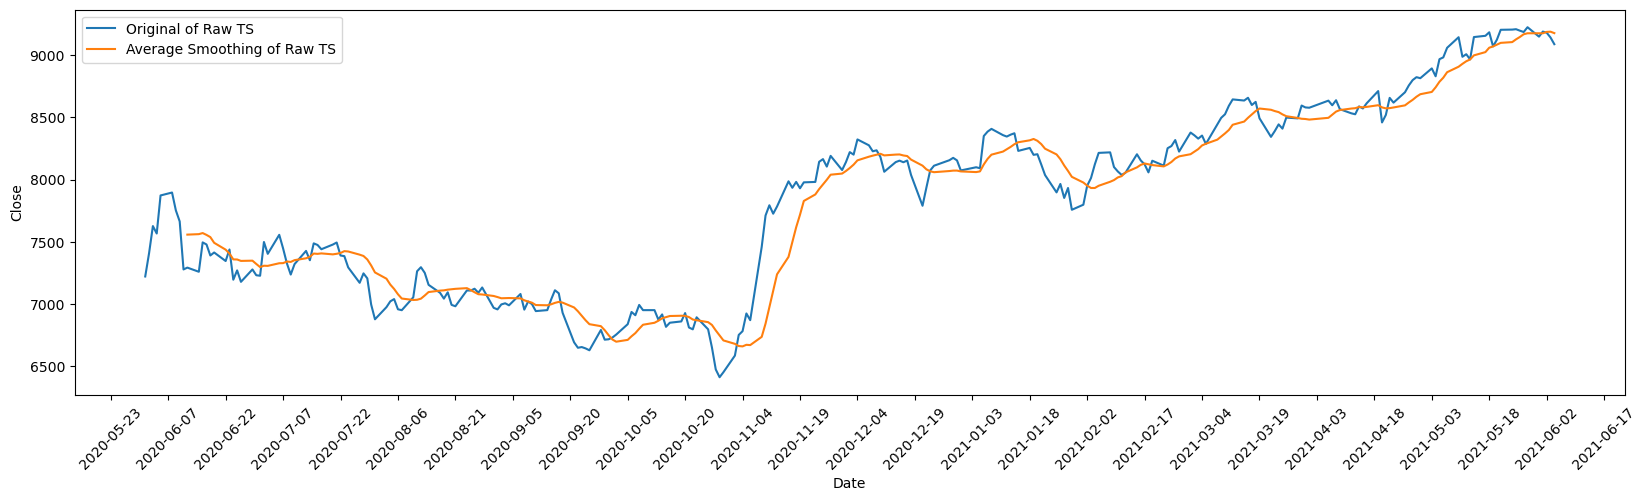

In [13]:
stock_ts_with_avg_smoothing = stock_ts.average_smoothing(10)

- NOTE: Code below is trash. Can't get it to match tutorial by Carl.

In [14]:
ma_model_class = MA()

In [15]:
test_error_terms = [10]

In [16]:
ma_models = ma_model_class.train_ma_model(stock_ts.get_as_df(), test_error_terms)

MA( 10 )


/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-in

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  261
Model:                ARIMA(0, 0, 10)   Log Likelihood               -1677.620
Date:                Thu, 21 Dec 2023   AIC                           3379.240
Time:                        19:15:01   BIC                           3422.015
Sample:                             0   HQIC                          3396.434
                                - 261                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7827.5876    116.338     67.283      0.000    7599.570    8055.605
ma.L1          1.2033      0.073     16.485      0.000       1.060       1.346
ma.L2          1.2353      0.122     10.164      0.0

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
start_date = '2020-06-12'
end_date   = '2021-06-04'
ma_predictions = ma_model_class.predict_ma(ma_models, stock_ts.get_as_df(), stock_ts.get_as_df())

MA( <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x1a74e1a90> )


/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [18]:
ma_predictions[0]

261    8813.647764
262    8775.147953
263    8586.958085
264    8377.218882
265    8294.538193
          ...     
517    7827.587637
518    7827.587637
519    7827.587637
520    7827.587637
521    7827.587637
Name: predicted_mean, Length: 261, dtype: float64

In [19]:
avg_smoothing_df = stock_ts_with_avg_smoothing.get_as_df()
avg_smoothing_df

,Close
Date,
2020-06-12,7557.829980
2020-06-15,7561.619971
2020-06-16,7570.339941
2020-06-17,7555.569971
2020-06-18,7537.910010
...,...
2021-05-31,9175.360059
2021-06-01,9175.940039
2021-06-02,9186.940039


In [20]:
import pandas as pd

prediction_series = ma_predictions[0]
prediction_series

261    8813.647764
262    8775.147953
263    8586.958085
264    8377.218882
265    8294.538193
          ...     
517    7827.587637
518    7827.587637
519    7827.587637
520    7827.587637
521    7827.587637
Name: predicted_mean, Length: 261, dtype: float64

In [21]:
dates = stock_ts.get_as_df().index
# dates = stock_ts.get_as_df().index[9:]
dates

DatetimeIndex(['2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12',
               ...
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-05-31', '2021-06-01', '2021-06-02',
               '2021-06-03', '2021-06-04'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

In [22]:
prediction_df = prediction_series.to_frame()
prediction_df["Date"] = dates
prediction_df.set_index('Date', inplace=True)

In [23]:
prediction_df

,predicted_mean
Date,
2020-06-01,8813.647764
2020-06-02,8775.147953
2020-06-03,8586.958085
2020-06-04,8377.218882
2020-06-05,8294.538193
...,...
2021-05-31,7827.587637
2021-06-01,7827.587637
2021-06-02,7827.587637


In [24]:
stock_ts.get_as_df()

,Close
Date,
2020-06-01,7221.399902
2020-06-02,7408.100098
2020-06-03,7626.399902
2020-06-04,7566.799805
2020-06-05,7872.600098
...,...
2021-05-31,9148.900391
2021-06-01,9189.700195
2021-06-02,9180.700195


In [25]:
merged_df = pd.concat([stock_ts.get_as_df(), avg_smoothing_df, prediction_df], axis=1).dropna()
merged_df

,Close,Close,predicted_mean
Date,,,
2020-06-12,7292.700195,7557.829980,7817.052416
2020-06-15,7259.299805,7561.619971,7827.587637
2020-06-16,7495.299805,7570.339941,7827.587637
2020-06-17,7478.700195,7555.569971,7827.587637
2020-06-18,7390.200195,7537.910010,7827.587637
...,...,...,...
2021-05-31,9148.900391,9175.360059,7827.587637
2021-06-01,9189.700195,9175.940039,7827.587637
2021-06-02,9180.700195,9186.940039,7827.587637


In [26]:
merged_df.tail(10)

,Close,Close,predicted_mean
Date,,,
2021-05-24,9205.500000,9105.070020,7827.587637
2021-05-25,9208.700195,9127.220020,7827.587637
2021-05-26,9196.900391,9146.140039,7827.587637
2021-05-27,9186.099609,9168.129980,7827.587637
2021-05-28,9224.599609,9176.029980,7827.587637
2021-05-31,9148.900391,9175.360059,7827.587637
2021-06-01,9189.700195,9175.940039,7827.587637
2021-06-02,9180.700195,9186.940039,7827.587637
2021-06-03,9142.400391,9188.750098,7827.587637


<AxesSubplot: xlabel='Date'>

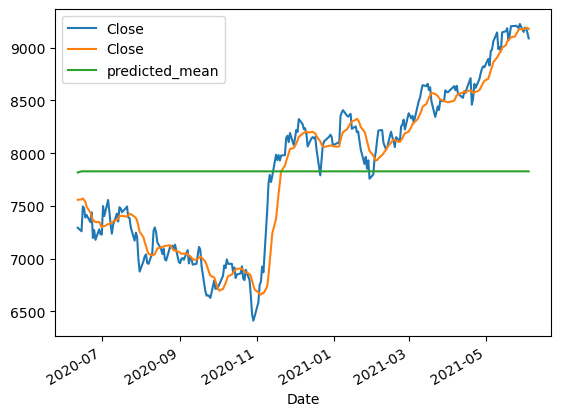

In [27]:
merged_df.plot()